In [ ]:
                                                        # Shreya 
                                               # Capstone Project on Autonomous Driving - Tesla Data

In [ ]:
!pip install opencv-python


In [ ]:
!pip install tensorflow


In [2]:
# PART-1
# Object Detection using CNN (Images + Bounding Box)
# CNN setup and data load
# Importing important libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:
# Load and Prepare Label.csv
labels_df = pd.read_csv(r"C:\Users\shrey\Downloads\Datasets (1)\Capstone 1\Part 1\labels.csv")
labels_df.columns = ['image_id', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
labels_df['image_id'] = labels_df['image_id'].astype(int)


In [10]:
print(labels_df.head())


   image_id              class  xmin  ymin  xmax  ymax
0         0                car   194    78   273   122
1         0                car   155    27   183    35
2         0  articulated_truck    43    25   109    55
3         0                car   106    32   124    45
4         1                bus   205   155   568   314


In [15]:
# Filter only existing images
IMG_DIR = r"C:\Users\shrey\Downloads\Datasets (1)\Capstone 1\Part 1\Images\Images"
IMG_SIZE = (224, 224)

available_files = {f.split('.')[0] for f in os.listdir(IMG_DIR)}
labels_df = labels_df[labels_df['image_id'].apply(lambda x: f"{x:08d}" in available_files)]


In [18]:
# Load & Process Images
images = []
boxes = []

for idx, row in labels_df.iterrows():
    filename = f"{int(row['image_id']):08d}.jpg"
    img_path = os.path.join(IMG_DIR, filename)

    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMG_SIZE)
        images.append(img)

        h, w = IMG_SIZE
        norm_box = [
            int(row['xmin']) / w,
            int(row['ymin']) / h,
            int(row['xmax']) / w,
            int(row['ymax']) / h
        ]
        boxes.append(norm_box)
    else:
        print(f"Missing file: {img_path}")

X = np.array(images)
y = np.array(boxes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)  # output: [xmin, ymin, xmax, ymax]
])

model.compile(optimizer='adam', loss='mse')
model.summary()


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 747s 2s/step - loss: 21823.0781 - val_loss: 0.4247
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - loss: 0.3831 - val_loss: 0.3837
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 739s 2s/step - loss: 0.3812 - val_loss: 0.4090
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - loss: 0.4061 - val_loss: 0.3758
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - loss: 0.3632 - val_loss: 0.3883
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - loss: 0.3615 - val_loss: 0.3866
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - loss: 0.3515 - val_loss: 0.4014
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 623s 1s/step - loss: 0.3411 - val_loss: 0.3837
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - loss: 0.3475 - val_loss: 0.3970
Epoch 10/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - loss: 0.3480 - val_loss: 0.3735


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


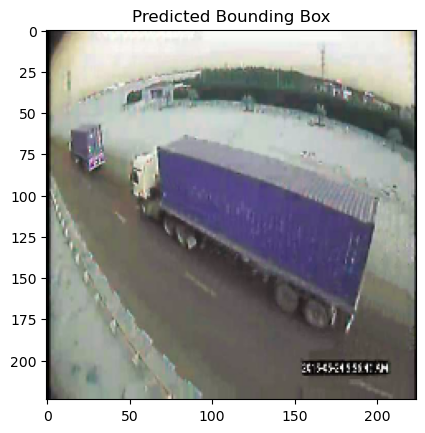

In [26]:
# Predict and Visualize
pred = model.predict(np.expand_dims(X_test[0], axis=0))[0]

plt.imshow(X_test[0].astype(np.uint8))
plt.title("Predicted Bounding Box")
plt.gca().add_patch(plt.Rectangle(
    (pred[0]*224, pred[1]*224),
    (pred[2]-pred[0])*224, (pred[3]-pred[1])*224,
    linewidth=2, edgecolor='r', facecolor='none'
))
plt.show()

In [ ]:
# =============================================
# 🚀 Optional (Commented) - YOLOv5 Training Code
# =============================================
"""
# !git clone https://github.com/ultralytics/yolov5.git
# %cd yolov5
# !pip install -r requirements.txt

# Prepare YOLO annotations in TXT format and organize as:
# /images/train, /images/val, /labels/train, /labels/val
# Each label file: class_id x_center y_center width height (normalized)

# Train YOLO model
# !python train.py --img 416 --batch 16 --epochs 50 --data custom.yaml --weights yolov5s.pt
"""


In [28]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

if gpus:
    print("✅ GPU is available and TensorFlow can use it.")
else:
    print("❌ GPU is NOT available to TensorFlow.")


Available GPUs: []
❌ GPU is NOT available to TensorFlow.


In [40]:
# PART-2
# EDA on Tesla Autopilot Death
# Load & Clean the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\shrey\Downloads\Datasets (1)\Capstone 1\Part 2\Tesla - Deaths.csv")

# Display first few rows
df.head()


,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [42]:
# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Convert date column
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Drop rows with missing date or death count
df = df.dropna(subset=["Date", "Deaths"])

# Create a 'Year' column
df["Year"] = df["Date"].dt.year

# View cleaned dataframe
df.head()


,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2023,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2023,2023-01-07,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2023,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [44]:
print(df.columns.tolist())


['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds', 'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths', 'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO', 'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Deceased 4']


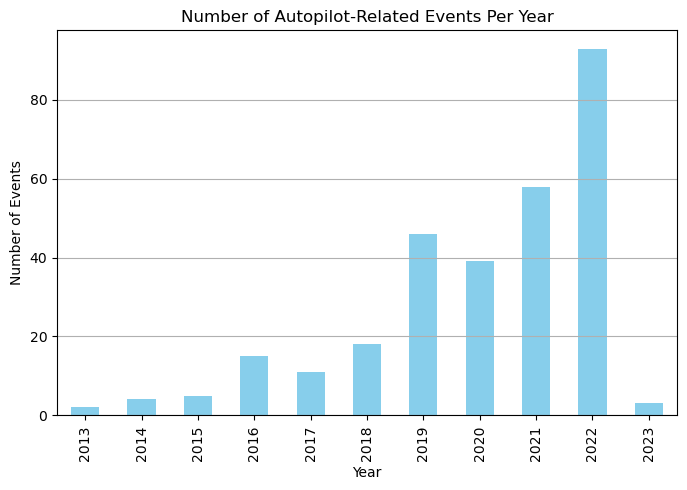

In [46]:
# Events per year
plt.figure(figsize=(8,5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Autopilot-Related Events Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(axis='y')
plt.show()

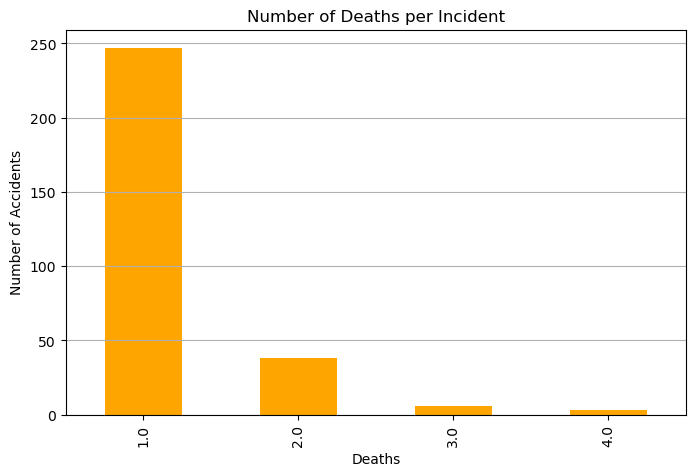

In [48]:
# Deaths per incident
plt.figure(figsize=(8,5))
df['Deaths'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Number of Deaths per Incident")
plt.xlabel("Deaths")
plt.ylabel("Number of Accidents")
plt.grid(axis='y')
plt.show()

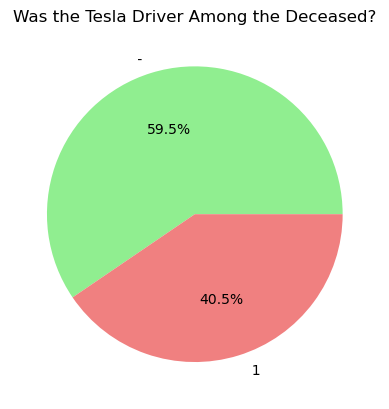

In [50]:
# Tesla driver involvement
plt.figure()
df['Tesla driver'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Was the Tesla Driver Among the Deceased?")
plt.ylabel('')
plt.show()


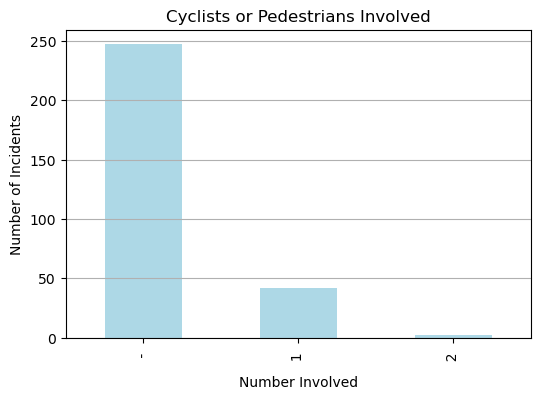

In [52]:
# Cyclists or Pedestrians involved
plt.figure(figsize=(6,4))
df['Cyclists/ Peds'].value_counts().plot(kind='bar', color='lightblue')
plt.title("Cyclists or Pedestrians Involved")
plt.xlabel("Number Involved")
plt.ylabel("Number of Incidents")
plt.grid(axis='y')
plt.show()

In [62]:
# Tesla drver + Cyclists/Pedestrians Fatalities
# Clean 'Cyclists/ Peds' column to numeric
df['Cyclists/ Peds'] = pd.to_numeric(df['Cyclists/ Peds'], errors='coerce')

# Now safely run the query
combo = df.query("`Tesla driver` == 'Yes' and `Cyclists/ Peds` > 0").shape[0]
print(f"Incidents where both Tesla driver and cyclist/pedestrian died: {combo}")



Incidents where both Tesla driver and cyclist/pedestrian died: 0


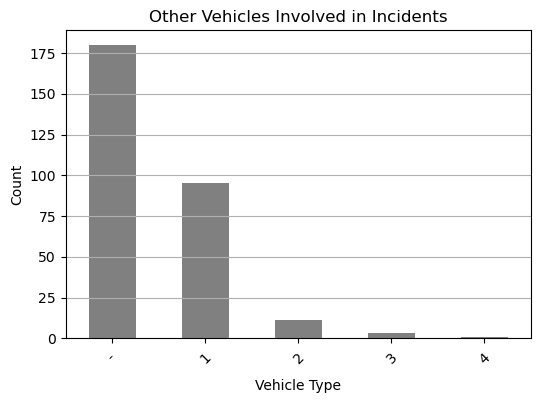

In [64]:
# 
plt.figure(figsize=(6,4))
df['Other vehicle'].value_counts().plot(kind='bar', color='gray')
plt.title("Other Vehicles Involved in Incidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

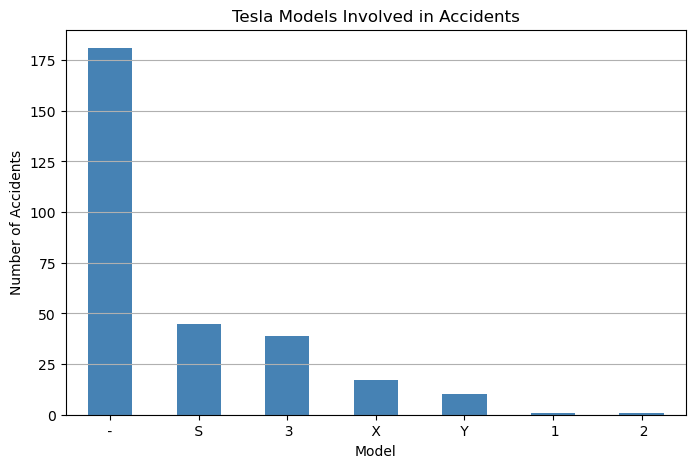

In [66]:
plt.figure(figsize=(8,5))
df['Model'].value_counts().plot(kind='bar', color='steelblue')
plt.title("Tesla Models Involved in Accidents")
plt.xlabel("Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


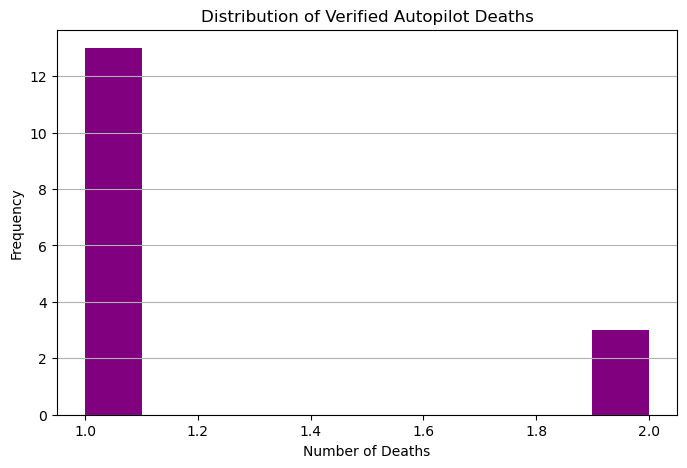

In [70]:
# Convert the column to numeric (invalid entries will become NaN)
df['Verified Tesla Autopilot Deaths'] = pd.to_numeric(df['Verified Tesla Autopilot Deaths'], errors='coerce')

# Now plot the histogram
plt.figure(figsize=(8,5))
df['Verified Tesla Autopilot Deaths'].dropna().astype(int).plot(kind='hist', bins=10, color='purple')
plt.title("Distribution of Verified Autopilot Deaths")
plt.xlabel("Number of Deaths")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()
